## Further Integration of Data Sets

In the previous exercise, we concatenated sales data collected over multiple years in order to construct one big dataset comprising all those years.  Each individual dataset had the same structure, and we concatenated them row-wise to preserve that structure over a long timeline, so that we could examine temporal trends in the data.

In this exercise, we will consider the integration of related, but structurally different datasets, along a different axis, enabling us to compute new information from the integrated data.

### Step 1.

Execute the code cell below.  You'll see that two dataframes are created, one for sales during 2018, and one for orders during 2018.  After creating the two dataframes, examine the contents of each.

In [1]:
import pandas as pd
%matplotlib inline

sales2018 = pd.read_csv('salesdata.csv', index_col='Month')
orders2018 = pd.read_csv('orders.csv', index_col='Month')

In [2]:
sales2018

,Pens,Pencils,Erasers,Paper
Month,,,,
Jan,400,550,80,480
Feb,370,420,55,450
Mar,255,302,25,280
Apr,150,225,20,200
May,200,275,41,225
Jun,125,170,25,184
Jul,50,80,10,100
Aug,425,600,90,505
Sep,423,580,95,525


In [3]:
orders2018

,Pens,Pencils,Erasers,Paper
Month,,,,
Jan,1200,1500,400,1400
Apr,500,500,100,600
Jul,1000,1400,400,1200
Oct,500,500,100,600


### Step 2.

The ```sales2018``` dataframe records the sales in each product category during each month.  The ```orders2018``` dataframe records the purchasing of new inventory at the start of each quarter during 2018.  In other words, our company updates in-stock inventory every 3 months, by placing new orders with our suppliers, and then that inventory is depleted as we make sales.  We would like to combine these two datasets so that we can evaluate our in-stock inventory during any month throughout the year.

The sales and orders datasets are both indexed by ```Month```, and we want to combine sales and order information for each month.  Therefore, we want to concatenate column-wise.

While the sales data is available for all 12 months, the orders data are listed only for 4 of the 12 months of the year.  We want to combine the data for those months that are shared between the two datasets (Jan, Apr, Jul, Oct), while also including the sales data from all months.  When we combine multiple datasets, we often need to decide how we want to "join" the data, given that they might have different sets of keys in an index.  The function ```pd.concat``` has an option called ```join```, which can take one of two different values:

* ```join = 'inner'``` : keep only those keys that are in the intersection of the dataframe indexes
* ```join = 'outer'``` : keep only those keys that are in the union of the dataframe indexes

This terminology is taken from databases, and is described in much more detail in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).  An "inner join" will result in a concatenated dataframe only for those rows or columns that occur in *all* of the dataframes being combined.  An "outer join" will result in a concatenated dataframe only for those rows or columns that occur in *any* of the dataframes being combined.  Since we want to keep all 12 months in our new dataset (instead of just the 4 that are shared), we want to do an "outer join", which is the default behavior for ```pd.concat```.

Because each dataframe contains the same columns (Pens, Pencils, Erasers, Paper), we will want to create a hierarchical MultiIndex for the columns, with each of the four product categories listed along with information about whether it is part of the sales or orders datasets.  In other words, the column MultiIndex will have a first level that indicates whether it is about the sales or orders data, and a second level indicating the product category (Pens, Pencils, Erasers, Paper). In the previous exercise, we created a similar sort of MultiIndex for the date entries representing Year (first level) and Month (second level).

In the code cell below, write an expression to concatenate the two dataframes column-wise and store the combined data in a new variable named ```sales_and_orders```:

* use the ```pd.concat``` function
* use the ```keys``` argument in the function to give the names <code>sales</code> and <code>orders</code> to the first level of the entries in the column MultiIndex
* use the ```sort=False``` argument to the function so that it preserves the order of the full sequences of months in the sales dataframe (using ```sort=True``` would sort the month names alphabetically, which we do not want)
* use the `axis=1` argument to specify that the concatenation should be column-wise

Once you're done, inspect the resulting dataframe.  The index should be the 12 months from Jan through Dec, and there should be 8 columns, representing the number of sales and orders in each of the 4 product categories.  Because orders are only placed in Jan, Apr, Jul and Oct, the orders data should be missing (NaN) for all other months.

## Graded Cell

This cell is worth 35% of the grade for this assignment.

In [4]:
sales_and_orders = pd.concat([sales2018,orders2018], sort = False, axis = 1, keys = ['sales','orders'])

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [5]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testSalesOrders

try:
    print(testSalesOrders(sales_and_orders))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


### Step 3.

The ```sales_and_orders``` dataframe shown above can be seen to have some missing data.  Let's first think about why it is missing.  In a narrow, technical sense, the orders data for 8 of the 12 months are missing because those months were not part of the orders dataframe.  So when we did an "outer" join, pandas retained those keys but could not fill in any values for those cells.  (If we had done an "inner" join, pandas would have kept only the 4 months for which we have both sales and orders data, but then there would be no empty cells.)

We previously discussed different strategies for dealing with missing data. One option for missing data is to fill it in.  In the case of this new combined dataframe, we can do so unambiguously.  The orders data during 8 months of the year is not "missing" because someone forgot to write it down or there was an error in retrieving it.  It is only "missing" because of the outer join we did. In addition, we know that the company updates it's in-stock inventory every 3 months. Therefore, we know that no orders were placed in each of the 8 months, and we can fill in the missing entries with 0.0 orders. 

In the code cell below, use the ```fillna``` method on the ```sales_and_orders``` dataframe to fill in the missing orders data with 0.0 orders.  In addition, pass in the option ```inplace=True``` to modify the dataframe "in place"; if you don't pass that option, a new dataframe will be returned with the missing data filled in, but the ```sales_and_orders``` dataframe will remain unchanged.

Inspect the dataframe to make sure that you have filled in the missing data correctly.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [6]:
sales_and_orders.fillna(0.0, inplace=True)

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [7]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testFillna

try:
    print(testFillna(sales_and_orders))   
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


The new dataframe created contains information about sales and orders, organized through the hierarchical MultiIndex describing the names of the columns.  Although we haven't worked much with MultiIndexes, they support convenient name-based indexing such as we've seen before with dataframes.  For example, if we wanted to examine just the sales part of the dataframe, we could extract the subset of the dataframe with ```sales``` in the first level of the MultiIndex, as in the first code cell below.

Execute the two code cells below and inspect the printed output.

In [8]:
print(sales_and_orders['sales'])

     Pens  Pencils  Erasers  Paper
Jan   400      550       80    480
Feb   370      420       55    450
Mar   255      302       25    280
Apr   150      225       20    200
May   200      275       41    225
Jun   125      170       25    184
Jul    50       80       10    100
Aug   425      600       90    505
Sep   423      580       95    525
Oct   200      225       60    400
Nov   105      106       12    203
Dec    78       69       15     99


In [9]:
print(sales_and_orders['orders'])

       Pens  Pencils  Erasers   Paper
Jan  1200.0   1500.0    400.0  1400.0
Feb     0.0      0.0      0.0     0.0
Mar     0.0      0.0      0.0     0.0
Apr   500.0    500.0    100.0   600.0
May     0.0      0.0      0.0     0.0
Jun     0.0      0.0      0.0     0.0
Jul  1000.0   1400.0    400.0  1200.0
Aug     0.0      0.0      0.0     0.0
Sep     0.0      0.0      0.0     0.0
Oct   500.0    500.0    100.0   600.0
Nov     0.0      0.0      0.0     0.0
Dec     0.0      0.0      0.0     0.0


### Step 4.

As noted above, we are interested in tracking in-stock inventory over each month.  Let's assume we had zero in-stock inventory at the end of 2017, so the product orders we made in Jan 2018 represent the initialization of our inventory (i.e., 1200 Pens, 1500 Pencils, 400 Erasers and 1400 reams of Paper).  That inventory is depleted as we make sales throughout Jan, Feb, and Mar, and is increased once we place more orders in Apr, in a process that continues throughout the year.

In other words, our inventory in each product category during any month is equal to the difference between the sum of all orders that we have made up to that month and the sum of all sales that we have made up to that month.

A mathematical operation that captures this notion of "sum of everything up until this point" is called a *cumulative sum*.  Both numpy and pandas provide functions and/or methods to carry out cumulative sums; in both packages, this function is called ```cumsum```.  Consider the small example in the code cell below, which you should execute and then examine the printed output.

In [10]:
import numpy as np
alist = [1,2,3,4,5,6,7,8,9,10]
print(np.sum(alist))
print(np.cumsum(alist))

55
[ 1  3  6 10 15 21 28 36 45 55]


Where a ```sum``` operation simply computes the sum of all elements in a sequence and returns the total, a ```cumsum``` operation returns a sequence of cumulative sums, i.e., the sum of all elements up to a given position in the sequence.  By definition, the last entry in a sequence of cumulative sums is equal to the single value produced by just summing that sequence (55, in the case of the example above).  If it's not completely clear what the data produced by the ```cumsum``` should be, work through a simple example for yourself.  For example, the first entry in the cumulative sum is just the first element of ```alist```; the second entry is the sum of the first two elements: 1+2; the third entry is the sum of the first three elements, etc.

### Step 5.

Let's restate the objective once more: the inventory in each product category during any month is equal to the difference between the <b>sum of all orders</b> that we have made up to that month and the <b>sum of all sales</b> that we have made up to that month.

In the code cell below, write an expression to compute the monthly inventory based on the difference between the order and sales data, and assign the result to the variable ```inventory```.  Hint: You'll want to separately extract the `orders` and the `sales` portion of the `sales_and_ordered` dataframe, and use the ```cumsum``` method on each resulting dataframe to get the cumulative totals at each month. Finally, find the difference between the two.

## Graded Cell

This cell is worth 35% of the grade for this assignment.

In [11]:
inventory = sales_and_orders['orders'].cumsum()-sales_and_orders['sales'].cumsum()

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [12]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testInventory

try:
    print(testInventory(inventory, sales_and_orders))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


### Step 6.

Make a plot of the inventory in each product category across each month of the year.

## Graded Cell

This cell is worth 10% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="MoreIntegratingDSStep6.png" width=400 height=400  align="left"/>

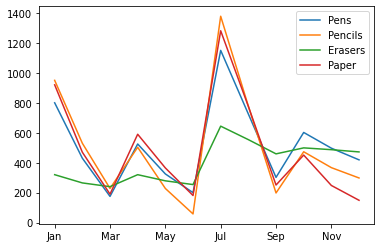

In [13]:
inventory.plot()